# Lab 1: Linear regression and data fitting

## BIOS 26210 fall 2019
## Name: 
## Section:

In this assignment you will write your own functions to perform linear regression and analyze the results


In [1]:
# Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy import stats
import pandas as pd

ModuleNotFoundError: No module named 'scipy'

## Part 1: linear regression on 2-variable data sets

Linear regression is a supervised learning method for predicting the value of a response variable (Y) based on a linear model of the explanatory variable (X). The following scripts illustrate it using the function linregress() from the stats package.

First, let us generate a data set with y a linear function of x with known slope and intercept, plus added random noise:

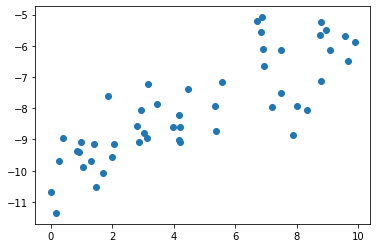

In [2]:
m = 0.4 # slope
b = -10 # intercept
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = m * x + b + rng.randn(50)
plt.scatter(x, y)
plt.show()

Ue the LinearRegression function to see whether it returns the correct slope and intercept and how well the line fits the data:

Model slope:     0.4272088103606956
Model intercept: -9.998577085553208
R^2:             0.6751620299329717


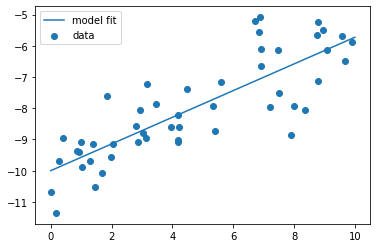

In [3]:
slope, intercept, r, p_value, std_err = stats.linregress(x,y)

print("Model slope:    ", slope)
print("Model intercept:", intercept)
print("R^2:            ", r**2)

xfit = np.linspace(0, 10, 1000)
yfit = xfit*slope + intercept

plt.scatter(x, y, label = 'data')
plt.plot(xfit, yfit, label = 'model fit')
plt.legend()
plt.show()

### Q1.1 Write your own linear regression function 

* Inputs: two vectors (X and Y) for the explanatory and response data. Don't forget to check that they are the same length!

* DO: calculate  the slope and intercept of the best-fit line, and the coefficient of determination $r^2$.

* Outputs: the best-fit slope, intercept, and the coefficient of determination $r^2$.

To calculate the slope and intercept, solve the normal equation below, where $\beta$ is the vector of parameters (slope and intercept), $A$ is the matrix containing a column of x values and a column of ones, $A^T$ is its transpose, and $y$ is the column vector of y values:

$$
(A^T A) \beta = A^T y
$$

To calculate the coefficient of determination, you can use either the definition:

$$ r^2 = \frac{Cov(X,Y)^2}{Var(X)Var(Y)}$$

or the fact that the coefficient of determination determines the fraction of variance explained by linear regression:

$$ r^2 = \frac{Var(\hat Y)}{Var(Y)} $$

where $\hat Y$ is the predicted response values: $\hat Y = mX + b$

You may find the following numpy functions useful for performing array calculations:

.T for array transpose

np.column_stack() https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html

np.linalg.solve() https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html

np.cov() https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cov.html

np.var() https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.var.html (Please note you have to specify ddof=1 otherwise variance will be incorrect!)

Test your function on the simulated data and make sure it returns the same values as the LinearRegression() function.

In [ ]:
# Code here

Answers here

### Q1.2 Calculate and plot the residuals

Calculate the residuals of the simulated data set and plot them over time. Report whether the plot of the residuals is consistent with the assumptions of linear regression. Calculate the fraction of the variance of the response variable that is in the residuals and relate it to the coefficient of determination $R^2$.


In [ ]:
# Code here

Answers here

## Part 2: Data analysis
You will analyze two data sets in this part

### Q2.1 Lynx and Hare pelt data
Load the file "pelt_data.csv" as a pandas object and plot the time series of Lynx and Hare together. Perform linear regression on the number of Lynx and Hare *at the same time points*. Then use 

In [4]:
pelts = pd.read_csv("pelt_data.csv")
pelts.head()

,Year,Hare,Lynx
0,1845,19580,30090
1,1846,19600,45150
2,1847,19610,49150
3,1848,11990,39520
4,1849,28040,21230


Answers here

Model slope:     0.27265228381045714
Model intercept: 15847.116553454242
R^2:             0.2743683741230978


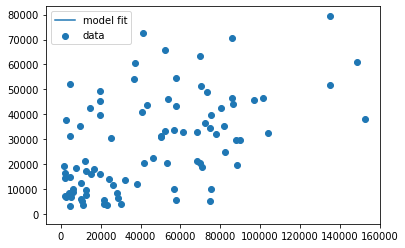

In [22]:
n = len(pelts.Hare)
x = pelts.Hare.shift(1)[1:]
y = pelts.Lynx[1:]
len(x)
len(y)
slope, intercept, r, p_value, std_err = stats.linregress(x,y)

print("Model slope:    ", slope)
print("Model intercept:", intercept)
print("R^2:            ", r**2)

plt.scatter(x, y, label = 'data')
plt.plot(xfit, yfit, label = 'model fit')
plt.legend()
plt.show()

Grading rubric:

Part 1: 10 pts for correct linear regression function, 5 pts for each linear regression analysis

Part 2: 10 pts for correct PCA function, 10 pts for each PCA analysis

Total: 50 pts

In [23]:
aus = pd.read_csv("ausair.csv")
aus.head()

,aussies
0,7.3187
1,7.3266
2,7.7956
3,9.3846
4,10.6647


In [24]:
rice = pd.read_csv("guinearice.csv")
rice.head()

,guinearice
0,0.311405
1,0.325180
2,0.339565
3,0.354580
4,0.370265
